In [112]:
!pip install plotly --upgrade

In [113]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [114]:
datapath = './college-data.csv'
df_orig = pandas.read_csv(datapath)
df_orig = df_orig.drop('Unnamed: 0',axis=1) 
df_orig

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [115]:
df_orig.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [116]:
df_orig.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Percebemos que há uma grande diferença entre os mínimos e máximos dos valores de alguns atributos, sendo necessário a normalização.

In [117]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

Percebe-se que temos atributos categóricos(não são numéricos).

Iremos categorizar a classe "private"

In [118]:
from sklearn.preprocessing import LabelEncoder
df_orig["Private"] = LabelEncoder().fit_transform(df_orig["Private"])
df_orig["Private"]

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: Private, Length: 777, dtype: int64

Plotamos as correlações entre os atributos e classe apenas para obter um panorama geral.

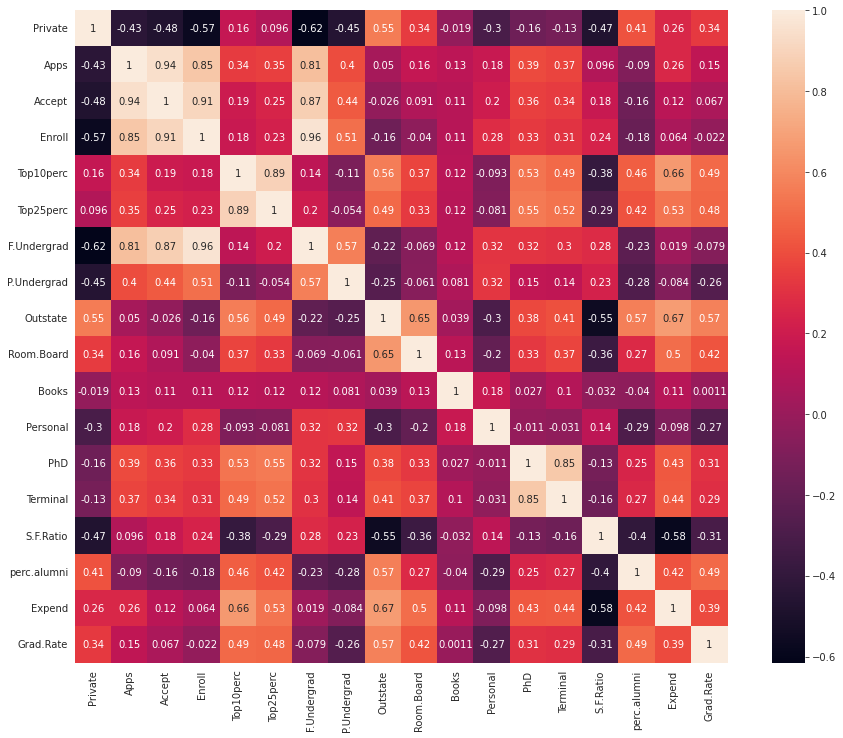

In [119]:
plt.subplots(figsize=(16,12))
sns.heatmap(
    df_orig.corr(),
    annot=True,
    square=True,
    cbar=True
)

In [120]:

# Here we removed redundant data and the labels
df_orig = df_orig.drop(['Terminal', 'Top25perc'],axis=1) 
df_orig

,Private,Apps,Accept,Enroll,Top10perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,2885,537,7440,3300,450,2200,70,18.1,12,7041,60
1,1,2186,1924,512,16,2683,1227,12280,6450,750,1500,29,12.2,16,10527,56
2,1,1428,1097,336,22,1036,99,11250,3750,400,1165,53,12.9,30,8735,54
3,1,417,349,137,60,510,63,12960,5450,450,875,92,7.7,37,19016,59
4,1,193,146,55,16,249,869,7560,4120,800,1500,76,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,2197,1515,543,4,3089,2029,6797,3900,500,1200,60,21.0,14,4469,40
773,1,1959,1805,695,24,2849,1107,11520,4960,600,1250,73,13.3,31,9189,83
774,1,2097,1915,695,34,2793,166,6900,4200,617,781,67,14.4,20,8323,49
775,1,10705,2453,1317,95,5217,83,19840,6510,630,2115,96,5.8,49,40386,99


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



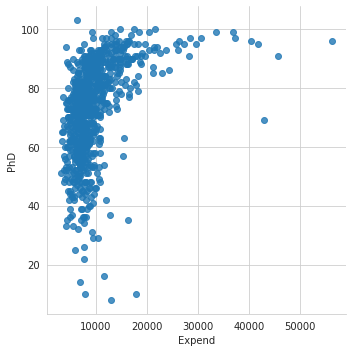

In [121]:
sns.set_style('whitegrid')
sns.lmplot('Expend', 'PhD', data=df_orig, fit_reg=False, aspect=1, palette='coolwarm')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



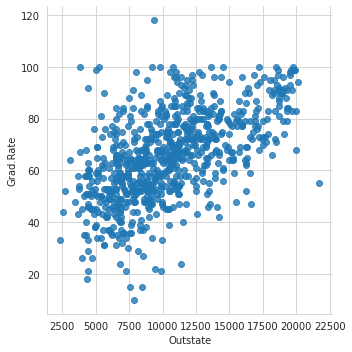

In [122]:
sns.set_style('whitegrid')
sns.lmplot('Outstate', 'Grad.Rate', data=df_orig, fit_reg=False, aspect=1, palette='coolwarm')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



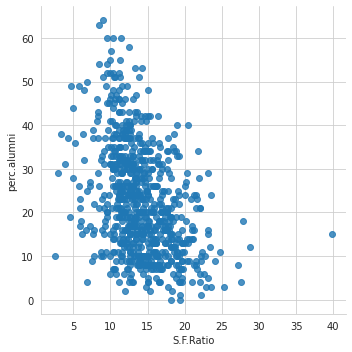

In [123]:

sns.lmplot('S.F.Ratio', 'perc.alumni', data=df_orig, fit_reg=False, aspect=1, palette='coolwarm')

Dropamos a classe que será predita.

In [124]:
df = df_orig.drop(['Private'], axis=1)
df

,Apps,Accept,Enroll,Top10perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,2885,537,7440,3300,450,2200,70,18.1,12,7041,60
1,2186,1924,512,16,2683,1227,12280,6450,750,1500,29,12.2,16,10527,56
2,1428,1097,336,22,1036,99,11250,3750,400,1165,53,12.9,30,8735,54
3,417,349,137,60,510,63,12960,5450,450,875,92,7.7,37,19016,59
4,193,146,55,16,249,869,7560,4120,800,1500,76,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,3089,2029,6797,3900,500,1200,60,21.0,14,4469,40
773,1959,1805,695,24,2849,1107,11520,4960,600,1250,73,13.3,31,9189,83
774,2097,1915,695,34,2793,166,6900,4200,617,781,67,14.4,20,8323,49
775,10705,2453,1317,95,5217,83,19840,6510,630,2115,96,5.8,49,40386,99


In [125]:
cnt=0
tradutor = {}
for col in df.columns:
  tradutor[col] =cnt
  cnt+=1 

Iremos normalizar os dados, a fim da diferença de ordem de magnitude dos atributos não afetar o algorítmo.

In [126]:
from sklearn.preprocessing import MinMaxScaler
df =  MinMaxScaler().fit_transform(df)
df

array([[0.03288693, 0.04417701, 0.10791254, ..., 0.1875    , 0.0726714 ,
        0.46296296],
       [0.04384229, 0.07053089, 0.07503539, ..., 0.25      , 0.13838671,
        0.42592593],
       [0.0280549 , 0.03903572, 0.04734938, ..., 0.46875   , 0.10460535,
        0.40740741],
       ...,
       [0.04198863, 0.07018813, 0.10382256, ..., 0.3125    , 0.09683865,
        0.36111111],
       [0.22127341, 0.09067713, 0.20166745, ..., 0.765625  , 0.70126492,
        0.82407407],
       [0.06056693, 0.06790312, 0.10319333, ..., 0.4375    , 0.02494015,
        0.82407407]])

Nós estamos fazendo um agrupamento com 5 centróides(escolha aleatória).

In [127]:
km = KMeans(n_clusters=5)
km.fit(df)
rotulos = km.fit_predict(df)
centroides = km.cluster_centers_
#labels = km.labels_
#df['label'] = labels

Vendo em gráfico a distribuição de acordo com os atributos: Apps e Accept

In [128]:
grafico1 = px.scatter(x = df[:,tradutor['Apps']], y = df[:,tradutor['Accept']], color = rotulos)
grafico3 = go.Figure(data = grafico1.data )
grafico3.show()

In [129]:
grafico1 = px.scatter(x = df[:,tradutor['Outstate']], y = df[:,tradutor['Grad.Rate']], color = rotulos)
grafico1.show()

In [130]:
grafico1 = px.scatter(x = df[:,tradutor['Expend']], y = df[:,tradutor['PhD']], color = rotulos)
grafico1.show()

Podemos combinar todos atributos em 2, para visualizamos de maneira 2d com PCA.

In [131]:
from sklearn.decomposition import PCA

In [132]:
pca = PCA(n_components=2)
df_orig_mais_pca = pca.fit_transform(df)
df_orig_mais_pca.shape

(777, 2)

In [133]:
grafico = px.scatter(x= df_orig_mais_pca[:,0], y = df_orig_mais_pca[:,1], color=rotulos)
grafico.show()

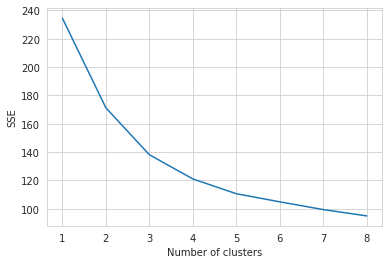

In [134]:

sse = {}
for k in range(1, 9):

    km = KMeans(n_clusters=k, random_state = 0)
    test = km.fit(df)

    sse[k] = km.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

Aqui, podemos ver 3 centróides são bons.
Depois da 4º iteração, a taxa devariação diminui abruptamente.

Iremos fazer a análise por Silhueta

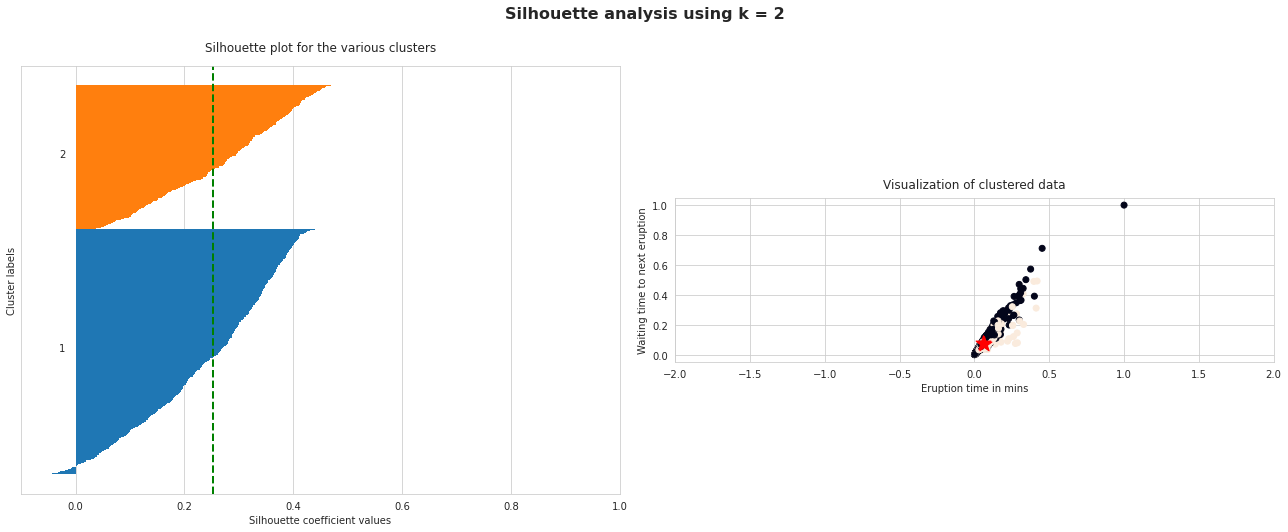

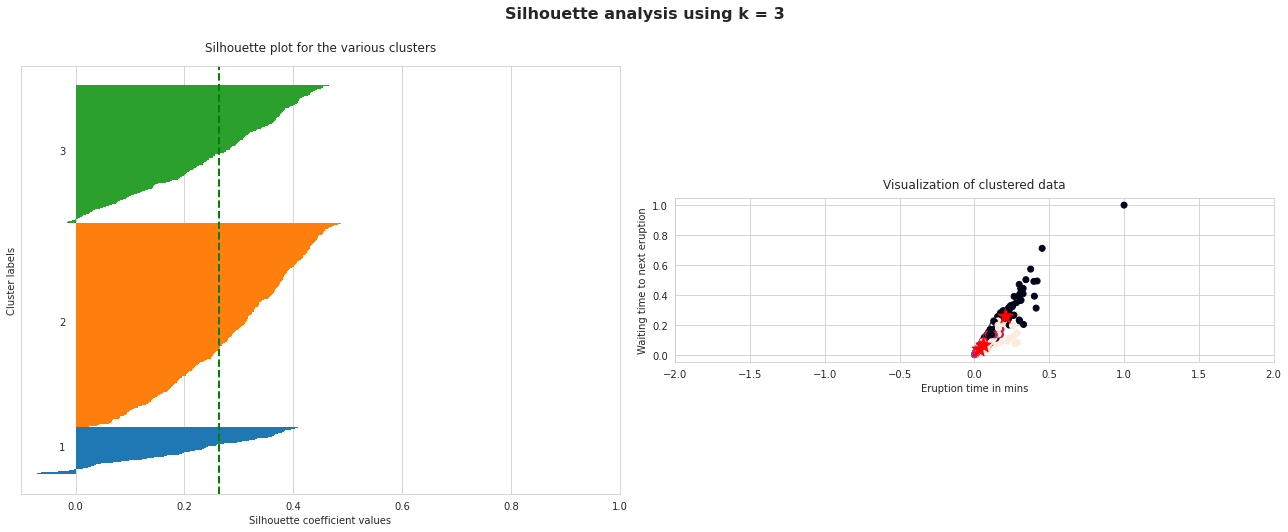

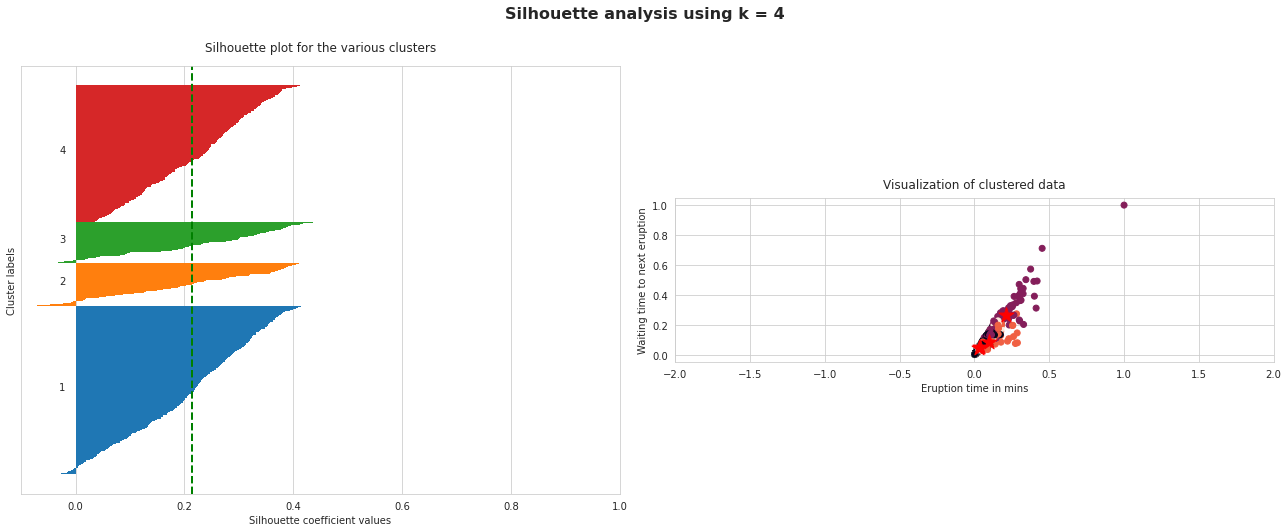

In [135]:
from sklearn.metrics import silhouette_samples, silhouette_score
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(df)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(df, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(df[:, 0], df[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

Analisando os scores(linha vertical tracejada verde), percebemos que é maior para 3 clusters, corroborando com o método Elbow. Iremos rodar o algorítmo para 3 centróides.

In [136]:
km = KMeans(n_clusters=3)
km.fit(df)
rotulos = km.fit_predict(df)
centroides = km.cluster_centers_

Iremos plotar os mesmos 3 gráficos anteriores para compararmos.

In [137]:
grafico1 = px.scatter(x = df[:,tradutor['Apps']], y = df[:,tradutor['Accept']], color = rotulos)
grafico3 = go.Figure(data = grafico1.data )
grafico3.show()

In [138]:
grafico1 = px.scatter(x = df[:,tradutor['Outstate']], y = df[:,tradutor['Grad.Rate']], color = rotulos)
grafico1.show()

In [139]:
grafico1 = px.scatter(x = df[:,tradutor['Expend']], y = df[:,tradutor['PhD']], color = rotulos)
grafico1.show()

Plotando com PCA, com apenas 3, conseguimos definir bem os clusters.

In [140]:
grafico = px.scatter(x= df_orig_mais_pca[:,0], y = df_orig_mais_pca[:,1], color=rotulos)
grafico.show()